In [1]:
import torch

In [73]:
from d2l import torch as d2l

In [74]:
import random

In [113]:
def synthetic_data(w,b,num_example):
    X = torch.normal(0,1,(num_example,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

In [114]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels)

In [77]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.0049, -0.4122]) 
label: tensor([3.5877])


In [83]:
features

tensor([[-1.0049, -0.4122],
        [-0.4290, -1.0495],
        [ 0.2968,  0.0431],
        ...,
        [ 0.8204,  0.4670],
        [ 0.0930, -0.2861],
        [-0.2852,  0.2560]])

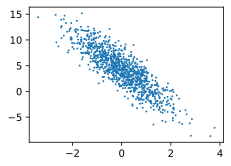

In [79]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach(),1)

In [85]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
        indices[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]

In [86]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 1.3245,  0.1693],
        [ 0.6890, -1.3354],
        [-0.8665,  0.3056],
        [ 1.5344,  0.8868],
        [ 0.3424, -0.4260],
        [ 1.0848,  0.8070],
        [ 1.2067, -0.1500],
        [ 1.5173,  0.7346],
        [-0.8166, -1.6615],
        [ 1.4287, -0.6872]]) 
 tensor([[ 6.2785],
        [10.1244],
        [ 1.4276],
        [ 4.2474],
        [ 6.3374],
        [ 3.6150],
        [ 7.1346],
        [ 4.7258],
        [ 8.2180],
        [ 9.3895]])


In [87]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [88]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [89]:
def squared_loss(y_hat,y):
    return (y_hat-y).reshape(y_hat.shape)**2/2

In [90]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [94]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}',train_l.mean())





epoch 1 tensor(5.0599e-05)
epoch 2 tensor(5.0610e-05)
epoch 3 tensor(5.0483e-05)


In [96]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [107]:
def load_array(data_arrays,batch_size,is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features,labels),batch_size)

In [98]:
from torch import nn

In [110]:
net = nn.Sequential(nn.Linear(2,1))

In [111]:
net[0].weight.data.normal_(0,0.01),net[0].bias.data.fill_(0)

(tensor([[ 0.0106, -0.0082]]), tensor([0.]))

In [102]:
loss = nn.MSELoss()

In [118]:
trainer = torch.optim.SGD(net.parameters(),lr=0.003)

In [119]:
num_epochs = 100
for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features),labels)
    print(f'epoch {epoch+1},loss {l:f}')

epoch 1,loss 10.737113
epoch 2,loss 3.224311
epoch 3,loss 0.968465
epoch 4,loss 0.291007
epoch 5,loss 0.087538
epoch 6,loss 0.026383
epoch 7,loss 0.008000
epoch 8,loss 0.002477
epoch 9,loss 0.000818
epoch 10,loss 0.000315
epoch 11,loss 0.000163
epoch 12,loss 0.000117
epoch 13,loss 0.000103
epoch 14,loss 0.000099
epoch 15,loss 0.000097
epoch 16,loss 0.000097
epoch 17,loss 0.000097
epoch 18,loss 0.000097
epoch 19,loss 0.000097
epoch 20,loss 0.000097
epoch 21,loss 0.000097
epoch 22,loss 0.000097
epoch 23,loss 0.000097
epoch 24,loss 0.000097
epoch 25,loss 0.000097
epoch 26,loss 0.000097
epoch 27,loss 0.000097
epoch 28,loss 0.000097
epoch 29,loss 0.000097
epoch 30,loss 0.000097
epoch 31,loss 0.000097
epoch 32,loss 0.000097
epoch 33,loss 0.000097
epoch 34,loss 0.000097
epoch 35,loss 0.000097
epoch 36,loss 0.000097
epoch 37,loss 0.000097
epoch 38,loss 0.000097
epoch 39,loss 0.000097
epoch 40,loss 0.000097
epoch 41,loss 0.000097
epoch 42,loss 0.000097
epoch 43,loss 0.000097
epoch 44,loss 0.000

In [2]:
x = torch.arange(12)

In [3]:
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape

torch.Size([12])

In [5]:
X = x.reshape(3,4)

In [6]:
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [11]:
x = torch.tensor([[[1,2],[3,4]]])

In [12]:
x.shape

torch.Size([1, 2, 2])

In [15]:
x = torch.tensor([1.0,2,3,8])
y = torch.tensor([2,2,2,2])
x + y,x-y,x*y,x/y,x**y

(tensor([ 3.,  4.,  5., 10.]),
 tensor([-1.,  0.,  1.,  6.]),
 tensor([ 2.,  4.,  6., 16.]),
 tensor([0.5000, 1.0000, 1.5000, 4.0000]),
 tensor([ 1.,  4.,  9., 64.]))

In [16]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 2.0086e+01, 2.9810e+03])

In [17]:
X = torch.arange(12,dtype=torch.float32).reshape(3,4)

In [19]:
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])

In [21]:
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [22]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [23]:
X.sum()

tensor(66.)

In [24]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [25]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [26]:
X[-1],X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [27]:
X[0:2,:]=12

In [28]:
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [29]:
before = id(Y)
Y = Y+X
id(Y) == before

False

In [30]:
Z = torch.zeros_like(Y)

In [33]:
print('id(z):',id(Z))

id(z): 140582517589184


In [34]:
Z[:] = X + Y

In [35]:
print('id(Z):',id(Z))

id(Z): 140582517589184


In [36]:
Z

tensor([[26., 25., 28., 27.],
        [25., 26., 27., 28.],
        [20., 21., 22., 23.]])

In [37]:
before = id(X)
X += Y
id(X) == before

True

In [38]:
A = X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [39]:
a = torch.tensor([3.5])
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [40]:
import os
os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file = os.path.join('..','data','house_tiny.csv')
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [41]:
!ls

dancing.jpg     house_tiny.csv  picasso.jpg     未命名.ipynb


In [42]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [43]:
inputs,outputs = data.iloc[:,0:2],data.iloc[:,2]

In [47]:
inputs

,NumRooms,Alley
0,NaN,Pave
1,2.0,NaN
2,4.0,NaN
3,NaN,NaN


In [45]:
outputs

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

In [48]:
inputs = inputs.fillna(inputs.mean())

/var/folders/yx/f0xkgf5x0w901nc_qxpq0b2w0000gn/T/ipykernel_77160/64727764.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


In [49]:
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [50]:
inputs = pd.get_dummies(inputs,dummy_na=True)

In [52]:
X,y = torch.tensor(inputs.values),torch.tensor(outputs.values)

In [53]:
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [54]:
import torch

In [55]:
x = torch.tensor([3.0])
y = torch.tensor([2.0])

In [56]:
x+y,x*y,x/y,x**y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

In [57]:
x = torch.arange(4)

In [58]:
x[3]

tensor(3)

In [59]:
X = torch.arange(24).reshape(2,3,4)
X


tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [60]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a+X,(a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [61]:
A = torch.arange(20).reshape(5,4)
A.shape,A.sum()

(torch.Size([5, 4]), tensor(190))

In [63]:
A.sum(axis=1,keepdims=True)

tensor([[ 6],
        [22],
        [38],
        [54],
        [70]])

In [64]:
A.shape,x.shape

(torch.Size([5, 4]), torch.Size([4]))

In [65]:
torch.mv(A,x)

tensor([ 14,  38,  62,  86, 110])

In [68]:
B = torch.ones(4,3)

In [70]:
torch.mm(A*1.0,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [72]:
u = torch.tensor([3,4])
torch.norm(u*1.0)

tensor(5.)